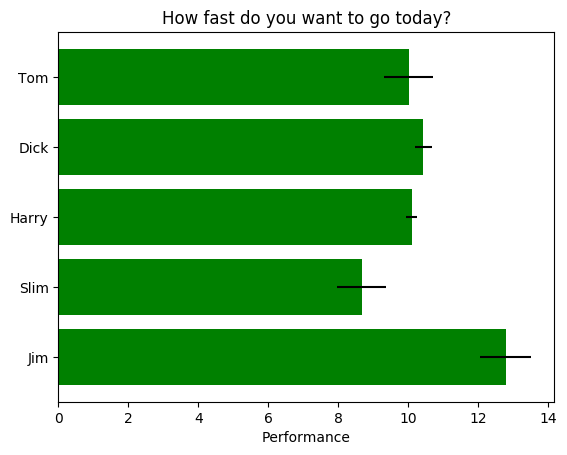

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

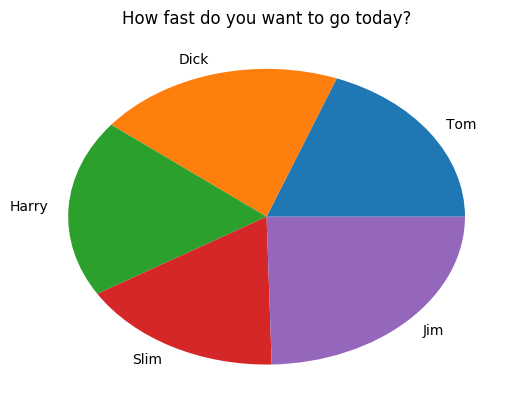

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


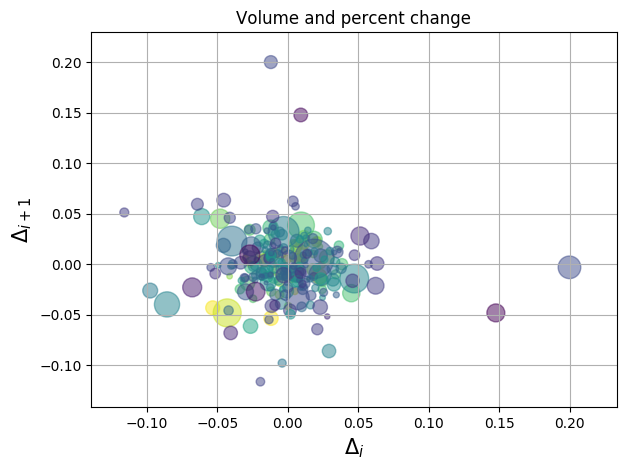

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

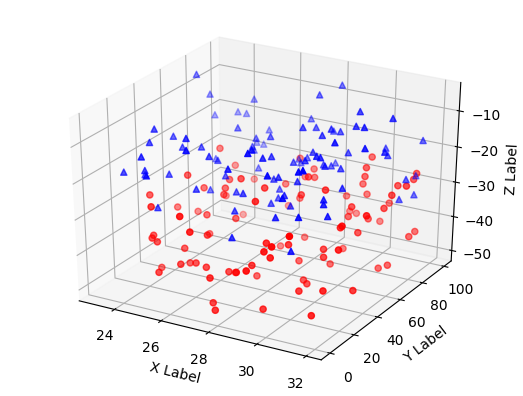

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [35]:

import pandas as pd
arrhythmia_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'

arrhythmia = pd.read_csv(arrhythmia_url,header=None, na_values=['?'])
pd.set_option('display.max_columns', 500)
pd.set_option('display.width',1000)
arrhythmia.head()

# column 0 = age, 1=(male=0,female=1),2=height, 3=weight, 14=heart rate


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,NaN,63.0,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,NaN,53.0,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,NaN,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,

In [0]:
#arrhythmia_data.dropna(subset=[14], inplace=True)

import pandas as pd

df = pd.DataFrame({'age' : arrhythmia[0],
                   'sex' : arrhythmia[1],
                   'height' : arrhythmia[2],
                   'weight' : arrhythmia[3],
                   'heart_rate' : arrhythmia[14]
                  })


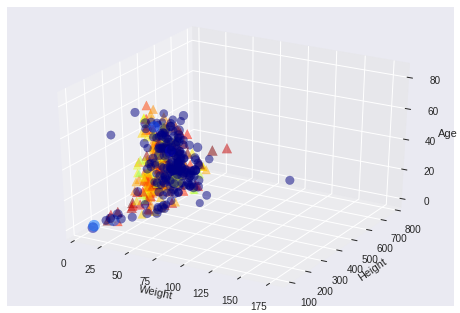

In [46]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sex_symbol= np.where( df['sex'] == 0, '\^', '\o')

xs= df['weight']
ys= df['height']
zs= df['age']
c= df['heart_rate']

# vmin, vmax forces the range of color in colormap; Without cmap, color is grey.
#ax.scatter(xs, ys, zs, marker='^', c=c, cmap=cm.jet, vmin=44, vmax=163)

# Extract all male data to plot
male= df[ (df.sex == 1)]
ax.scatter(male['weight'], male['height'], male['age'], marker='^', 
           s=male['heart_rate'], c=male['heart_rate'], 
           cmap=cm.jet, vmin=0, vmax=100, alpha=0.5)

# Extract all female data to plot
female = df[ (df.sex == 0)]
ax.scatter(female['weight'], female['height'], female['age'], marker='o', 
           s=female['heart_rate'], c=female['heart_rate'], 
           cmap=cm.jet, vmin=101, vmax=200, alpha=0.5)

ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_zlabel('Age')

plt.show()

# Weight data has outlier that skewed the chart

Weight outlier Tuple= (array([ 60, 126, 141, 213, 254, 316, 320]),)
i and e= 0 [ 60 126 141 213 254 316 320]
Weight Instance, Weight value:
 60      10
126     18
141      6
213    176
254    124
316     10
320     12
Name: weight, dtype: int64
Zscore value= [3.51006581 3.02733664 3.75143039 6.50656438 3.36882481 3.51006581
 3.38938351]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


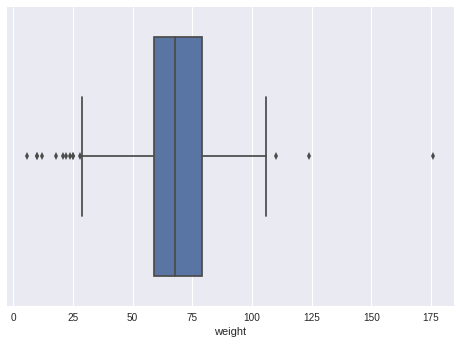

In [38]:
import seaborn as sns
from scipy import stats
import numpy as np

'''
******** To find weight outlier ************
Zscore is number of standard deviation from mean. 
Zscore threshold > 3, is considered outlier

'''
z = np.abs(stats.zscore(df['weight']))

outlier_tuple = np.where(z > 3)
print('Weight outlier Tuple=', outlier_tuple)
#print(weight.describe())

'''
To unpack tuple, eg t=(a,b)
for index, element in t :
  element(1) -> a
  element(2) -> b
'''
weight=df['weight']

for i, e in enumerate(outlier_tuple):
  print('i and e=',i, e)
  print('Weight Instance, Weight value:\n',
        weight[outlier_tuple[i]])
  print('Zscore value=',z[outlier_tuple[i]])

#To see outlier in weight
sns.boxplot(x=weight);


In [39]:
# Removing outlier in a single feature, would cause the rest of feature to misalign.

print('Before outlier removal- Weight shape', weight.shape)
print('After outlier removal - Weight shape', weight[(z < 3)].shape)


Before outlier removal- Weight shape (452,)
After outlier removal - Weight shape (445,)


In [40]:
'''
To calculate Interquartile range (IQR) or midspread or middle 50% or H-spread
IQR = Q3 - Q1
'''

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print('Q3 - Q1 = IQR=\n', Q3,Q1,IQR)


Q3 - Q1 = IQR=
 age            58.0
heart_rate     81.0
height        170.0
sex             1.0
weight         79.0
Name: 0.75, dtype: float64 age            36.0
heart_rate     65.0
height        160.0
sex             0.0
weight         59.0
Name: 0.25, dtype: float64 age           22.0
heart_rate    16.0
height        10.0
sex            1.0
weight        20.0
dtype: float64


In [0]:
'''
To remove anything below Q1 and anything above Q3
Below Q1= Q1 - Q3 = Q1 - 1.5*IQR
Above Q3 = Q3 + 1.5*IQR
'''
no_outlier_df = df[ ~( (df < (Q1 - 1.5*IQR)) | (df > (Q3 + 1.5*IQR)) ).any(axis=1)]

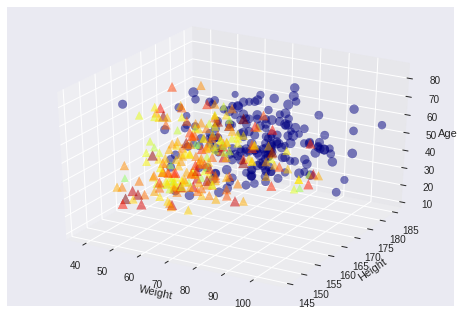

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

clean=no_outlier_df

# vmin, vmax forces the range of color in colormap; Without cmap, color is grey.

# Extract all male data to plot
male= clean[ (clean.sex == 1)]
ax.scatter(male['weight'], male['height'], male['age'], marker='^', 
           s=male['heart_rate'], c=male['heart_rate'], 
           cmap=cm.jet, vmin=0, vmax=100, alpha=0.5)

# Extract all female data to plot
female = clean[ (clean.sex == 0)]
ax.scatter(female['weight'], female['height'], female['age'], marker='o',
           s=female['heart_rate'], c=female['heart_rate'], 
           cmap=cm.jet, vmin=101, vmax=200, alpha=0.5)

ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_zlabel('Age')

plt.show()

# Chart with outlier removed

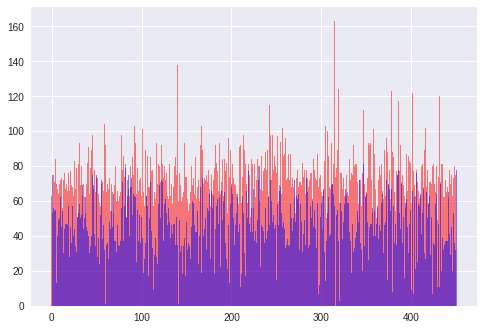

In [0]:
import matplotlib.pyplot as plt
import numpy as np

n_group = heart_rate.size
index = np.arange(n_group)

fig, ax = plt.subplots()

bar_width = 1

rect1 = ax.bar(index, heart_rate, bar_width, alpha=0.5, color='r',
              label='Heart Rate')
rect2 = ax.bar(index+bar_width, age, bar_width, alpha=0.5, color='b',
              label='Age')
#rect3 = ax.bar(index+bar_width+bar_width, sex, bar_width, alpha=0.5, color='g', label='Sex')

plt.show()


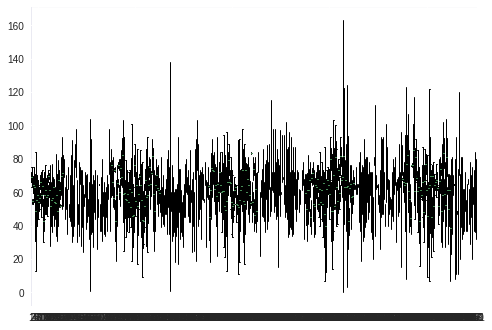

In [0]:

import matplotlib.pyplot as plt
import pandas as pd

data = arrhythmia_data[[0,14]]
features = ('Age','Heart_Rate')

plt.boxplot(data);